In [1]:
from models import DiffusivityData
from pathlib import Path
from optimize import Optimizer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Prepare the data in DiffusionData object.

In [2]:
Path().joinpath("./examples/AgCu_diffusion_coefficient_data.xlsx").absolute().__str__()
# Path().joinpath("/examples/AgCu_diffusion_coefficient_data.xlsx").absolute()

'C:\\Users\\ustcw\\Desktop\\Programming\\DCModeling\\examples\\examples\\AgCu_diffusion_coefficient_data.xlsx'

In [3]:
# Define a DiffusionData object.
elements = ["Ag", "Cu"]
phase = "FCC_A1"
diffusion_data = DiffusivityData(elements)
# load data
datafile = "./AgCu_diffusion_coefficient_data.xlsx"
diffusion_data.load_data_from_excel(datafile)

# thermodynamic interaction parameter datafile
thermo_inter_param_file = "./AgCu_thermodynamic_interaction_parameters.json"
diffusion_data.load_interaction_parameters(thermo_inter_param_file)
#
# # calculate end member diffusion coefficient data.
end_member_file = "./end_member_database.json"
diffusion_data.end_member_calc(end_member_file)


In [4]:
diffusion_data.data.head()

,Literature,Dtype,Element,A_mp,T_C,Dexp,TF,Weight,comp_A_mf,comp_B_mf,temp_celsius,temp_kelvin
0,Sato et al.,DT,A,99.164678,850.0,1.079941e-13,NaN,1,0.991647,0.008353,850.0,1123.0
1,Sato et al.,DT,A,97.446300,850.0,1.453115e-13,NaN,1,0.974463,0.025537,850.0,1123.0
2,Sato et al.,DT,A,96.634840,850.0,1.630797e-13,NaN,1,0.966348,0.033652,850.0,1123.0
3,Sato et al.,DT,A,99.140811,820.0,6.165950e-14,NaN,1,0.991408,0.008592,820.0,1093.0
4,Sato et al.,DT,A,97.446300,820.0,8.433348e-14,NaN,1,0.974463,0.025537,820.0,1093.0


In [5]:
diffusion_data.thermodynamic_factor_calc()
diffusion_data.data.head()

,Literature,Dtype,Element,A_mp,T_C,Dexp,TF,Weight,comp_A_mf,comp_B_mf,temp_celsius,temp_kelvin
0,Sato et al.,DT,A,99.164678,850.0,1.079941e-13,0.976375,1,0.991647,0.008353,850.0,1123.0
1,Sato et al.,DT,A,97.446300,850.0,1.453115e-13,0.926879,1,0.974463,0.025537,850.0,1123.0
2,Sato et al.,DT,A,96.634840,850.0,1.630797e-13,0.903121,1,0.966348,0.033652,850.0,1123.0
3,Sato et al.,DT,A,99.140811,820.0,6.165950e-14,0.974435,1,0.991408,0.008592,820.0,1093.0
4,Sato et al.,DT,A,97.446300,820.0,8.433348e-14,0.923147,1,0.974463,0.025537,820.0,1093.0


## Optimize the parameters using Optimizer object


In [6]:
optimizer = Optimizer(diffusion_data)


In [7]:
optimizer.diffusivity_data.data

,Literature,Dtype,Element,A_mp,T_C,Dexp,TF,Weight,comp_A_mf,comp_B_mf,temp_celsius,temp_kelvin
0,Sato et al.,DT,A,99.164678,850.0,1.079941e-13,0.976375,1,0.991647,0.008353,850.0,1123.0
1,Sato et al.,DT,A,97.446300,850.0,1.453115e-13,0.926879,1,0.974463,0.025537,850.0,1123.0
2,Sato et al.,DT,A,96.634840,850.0,1.630797e-13,0.903121,1,0.966348,0.033652,850.0,1123.0
3,Sato et al.,DT,A,99.140811,820.0,6.165950e-14,0.974435,1,0.991408,0.008592,820.0,1093.0
4,Sato et al.,DT,A,97.446300,820.0,8.433348e-14,0.923147,1,0.974463,0.025537,820.0,1093.0
...,...,...,...,...,...,...,...,...,...,...,...,...
124,Oikawa et al.,DC,AB,99.893939,701.0,6.025596e-15,0.996148,1,0.998939,0.001061,701.0,974.0
125,Oikawa et al.,DC,AB,99.000000,701.0,5.128614e-15,0.963507,1,0.990000,0.010000,701.0,974.0
126,Oikawa et al.,DC,AB,98.000000,701.0,4.677351e-15,0.926641,1,0.980000,0.020000,701.0,974.0
127,Oikawa et al.,DC,AB,96.000000,701.0,4.265795e-15,0.851923,1,0.960000,0.040000,701.0,974.0


In [8]:
optimizer.init_params

array([0.23731235])

In [19]:
# optimizer.method = "least_squares"
# optimizer.optimize()

optimizer.method = "minimize"
optimizer.optimize(method="Nelder-Mead")

In [20]:
optimizer.optimized_results

{'OptimizedResult':  final_simplex: (array([[50852.24290909],
        [50852.24281639]]), array([4.88746895, 4.88746895]))
            fun: 4.887468952492052
        message: 'Optimization terminated successfully.'
           nfev: 103
            nit: 50
         status: 0
        success: True
              x: array([50852.24290909]),
 'mse': 4.887468952492052,
 'optimized_params': array([50852.24290909])}

In [11]:
df = diffusion_data.data

<AxesSubplot:xlabel='Dexp', ylabel='D_1-para'>

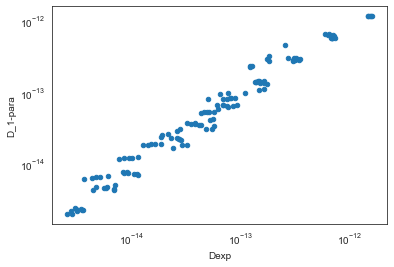

In [36]:
df.plot(x = "Dexp", y = "D_1-para", kind="scatter", logx=True, logy=True)

<AxesSubplot:xlabel='Experimental D (m$^2$/s)', ylabel='Predicted D (m$^2$/s)'>

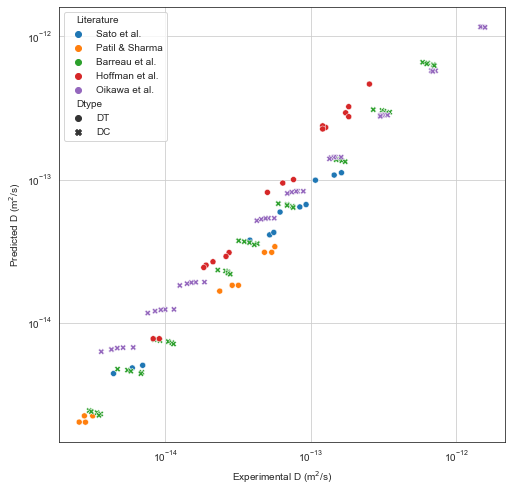

In [35]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlabel("Experimental D (m$^2$/s)")
ax.set_ylabel("Predicted D (m$^2$/s)")
ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)
ax.grid(True)
sns.scatterplot(
    data=df, x="Dexp", y="D_1-para", hue="Literature", style="Dtype",
    ax=ax, facecolors="none", palette="tab10"
)